In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/xkong100/Data620_Team3/master/final_Project/tweets.csv')

In [3]:
len(data.original_author.unique())

279

In [4]:
ts = data.groupby('original_author')
original_tweeter = ts.original_author
original_tweeter = original_tweeter.filter(lambda x: len(x) > 3)

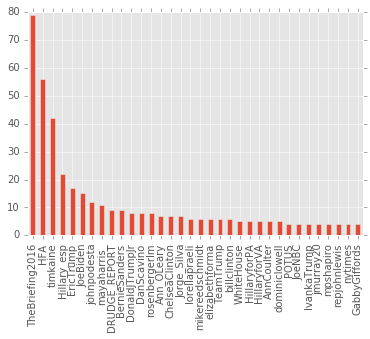

In [5]:
original_tweeter.value_counts().plot(kind='bar')

In [6]:
hillary,trump = data[data.handle == 'HillaryClinton'], data[data.handle == 'realDonaldTrump']

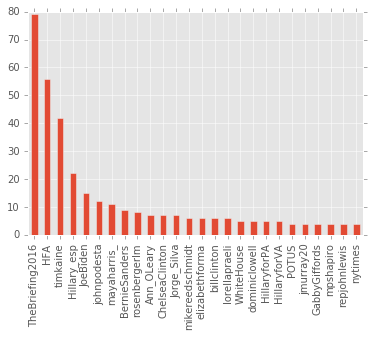

In [7]:
hillary_oa = hillary.groupby('original_author').original_author.filter(lambda x: len(x) > 3).value_counts().plot(kind='bar')

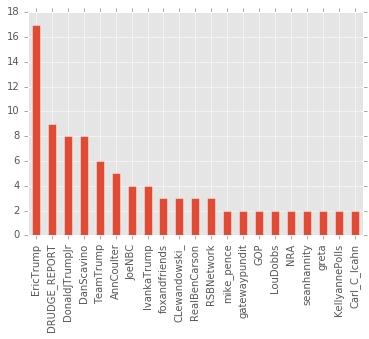

In [8]:
trump_oa = trump.groupby('original_author').original_author.filter(lambda x: len(x) > 1).value_counts().plot(kind='bar')

In [9]:
data.count()

id                         6444
handle                     6444
text                       6444
is_retweet                 6444
original_author             722
time                       6444
in_reply_to_screen_name     208
in_reply_to_status_id       202
in_reply_to_user_id         208
is_quote_status            6444
lang                       6444
retweet_count              6444
favorite_count             6444
longitude                    12
latitude                     12
place_id                    204
place_full_name             204
place_name                  204
place_type                  204
place_country_code          204
place_country               204
place_contained_within      204
place_attributes            204
place_bounding_box          204
source_url                 6444
truncated                  6444
entities                   6444
extended_entities          1348
dtype: int64

In [10]:
trump.time.unique()

array(['2016-09-27T22:13:24', '2016-09-27T21:08:22', '2016-09-27T20:31:14',
       ..., '2016-01-05T03:42:10', '2016-01-05T03:39:11',
       '2016-01-05T03:36:53'], dtype=object)

In [11]:
retweets = data[data['is_retweet']==True]
tweets = data[data['is_retweet']==False]

In [12]:
retweets.head()

,id,handle,text,is_retweet,original_author,time,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,is_quote_status,...,place_type,place_country_code,place_country,place_contained_within,place_attributes,place_bounding_box,source_url,truncated,entities,extended_entities
1,780916180899037184,HillaryClinton,"Last night, Donald Trump said not paying taxes...",True,timkaine,2016-09-27T23:45:00,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/t0...,{'media': [{'display_url': 'pic.twitter.com/t0...
2,780911564857761793,HillaryClinton,Couldn't be more proud of @HillaryClinton. Her...,True,POTUS,2016-09-27T23:26:40,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [{'id_str': '1536791610', 'n...",NaN
9,780874710049550336,HillaryClinton,3) Has Trump offered a single proposal to redu...,True,mcuban,2016-09-27T21:00:13,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com,False,"{'user_mentions': [{'id_str': '16228398', 'nam...",NaN
10,780869063648153601,HillaryClinton,The election is just weeks away. Check if you'...,True,ddlovato,2016-09-27T20:37:47,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com,False,"{'user_mentions': [{'id_str': '21111883', 'nam...",NaN
11,780867418012979204,realDonaldTrump,"On National #VoterRegistrationDay, make sure y...",True,GOP,2016-09-27T20:31:14,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone,False,"{'user_mentions': [{'id_str': '11134252', 'nam...",NaN


In [13]:
pd.options.display.max_colwidth = 600
retweets.iloc[[2]].text

9    3) Has Trump offered a single proposal to reduce the friction of starting a business. @HillaryClinton has https://t.co/OhFAFEFsUq
Name: text, dtype: object

In [14]:
retweets.iloc[[7]].text

36    Register and vote for Democrats like @HillaryClinton and @KatieMcGintyPA: https://t.co/tu6W6eS9xR #iRegistered… https://t.co/9ovdecqadN
Name: text, dtype: object

In [15]:
hillary_tweets = tweets[tweets['handle']!='realDonaldTrump']
trump_tweets = tweets[tweets['handle']=='realDonaldTrump']
trump_tweets.tail()

,id,handle,text,is_retweet,original_author,time,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,is_quote_status,...,place_type,place_country_code,place_country,place_contained_within,place_attributes,place_bounding_box,source_url,truncated,entities,extended_entities
6439,684219579548041218,realDonaldTrump,"""@lilredfrmkokomo: @realDonaldTrump My Facebook Groups are all voting TRUMP /4000 people! !!"" Great!",False,NaN,2016-01-05T03:47:14,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com/download/android,False,"{'user_mentions': [{'id_str': '26122621', 'name': 'Braggadocious', 'id': 26122621, 'screen_name': 'lilredfrmkokomo', 'indices': [1, 17]}, {'id_str': '25073877', 'name': 'Donald J. Trump', 'id': 25073877, 'screen_name': 'realDonaldTrump', 'indices': [19, 35]}], 'symbols': [], 'urls': [], 'hashtags': []}",NaN
6440,684218836569206784,realDonaldTrump,"""@marybnall01: @realDonaldTrump watched lowell mass speech. Awesome. Great crowd. Make America Great Again!!!!!!""",False,NaN,2016-01-05T03:44:17,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com/download/android,False,"{'user_mentions': [{'id_str': '3477455725', 'name': 'marybnall01', 'id': 3477455725, 'screen_name': 'marybnall01', 'indices': [1, 13]}, {'id_str': '25073877', 'name': 'Donald J. Trump', 'id': 25073877, 'screen_name': 'realDonaldTrump', 'indices': [15, 31]}], 'symbols': [], 'urls': [], 'hashtags': []}",NaN
6441,684218305100525569,realDonaldTrump,"""@ghosthunter_lol: Iowa key endorsement for @realDonaldTrump Can't wait for the Iowa caucus in 4 weeks! #Trump2016 https://t.co/JBfyFrZfFb""",False,NaN,2016-01-05T03:42:10,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com/download/android,False,"{'media': [{'display_url': 'pic.twitter.com/JBfyFrZfFb', 'sizes': {'thumb': {'h': 150, 'resize': 'crop', 'w': 150}, 'small': {'h': 255, 'resize': 'fit', 'w': 340}, 'large': {'h': 768, 'resize': 'fit', 'w': 1024}, 'medium': {'h': 450, 'resize': 'fit', 'w': 600}}, 'expanded_url': 'http://twitter.com/ghosthunter_lol/status/684198767730540545/photo/1', 'indices': [115, 138], 'id': 684198763573940224, 'url': 'https://t.co/JBfyFrZfFb', 'source_status_id_str': '684198767730540545', 'source_user_id_str': '596178928', 'source_status_id': 684198767730540545, 'id_str': '684198763573940224', 'source_u...","{'media': [{'display_url': 'pic.twitter.com/JBfyFrZfFb', 'sizes': {'thumb': {'h': 150, 'resize': 'crop', 'w': 150}, 'small': {'h': 255, 'resize': 'fit', 'w': 340}, 'large': {'h': 768, 'resize': 'fit', 'w': 1024}, 'medium': {'h': 450, 'resize': 'fit', 'w': 600}}, 'expanded_url': 'http://twitter.com/ghosthunter_lol/status/684198767730540545/photo/1', 'indices': [115, 138], 'id': 684198763573940224, 'url': 'https://t.co/JBfyFrZfFb', 'source_status_id_str': '684198767730540545', 'source_user_id_str': '596178928', 'source_status_id': 684198767730540545, 'id_str': '684198763573940224', 'source_u..."
6442,684217554861199360,realDonaldTrump,"""@iLoveiDevices: @EdwinRo47796972 @happyjack225 @FoxNews @krauthammer Minimizing dependency on China is crucial.Only Trump talks about that",False,NaN,2016-01-05T03:39:11,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com/download/android,False,"{'user_mentions': [{'id_str': '42568997', 'name': 'RA-Expression', 'id': 42568997, 'screen_name': 'iLoveiDevices', 'indices': [1, 15]}, {'id_str': '3291836573', 'name': 'Edwin Romero', 'id': 3291836573, 'screen_name': 'EdwinRo47796972', 'indices': [17, 33]}, {'id_str': '22722565', 'name': 'Deplorable Jack', 'id': 22722565, 'screen_name': 'happyjack225', 'indices': [34, 47]}, {'id_str': '1367531', 'name': 'Fox News', 'id': 1367531, 'screen_name': 'FoxNews', 'indices': [48, 56]}, {'id_str': '27744185', 'name': 'Charles Krauthammer', 'id': 27744185, 'screen_name': 'krauthammer', 'indices': [5...",NaN
6443,684216973815844866,realDonaldTrump,"""@SalRiccobono: @realDonaldTrump @troyconway Donald get big business back and# MAKE AMERICA GREAT AGAIN

In [16]:
import re
from nltk.corpus import stopwords
stop = stopwords.words('english')

hillary_corpus = hillary_tweets.loc[:,['text']]
hillary_corpus['text'] = hillary_corpus['text'].apply(lambda x:' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split()))
hillary_corpus['text'] = hillary_corpus['text'].str.lower()
hillary_corpus['text'] = hillary_corpus['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
trump_corpus = trump_tweets.loc[:,['text']]
trump_corpus['text'] = trump_corpus['text'].apply(lambda x:' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split()))
trump_corpus['text'] = trump_corpus['text'].str.lower()
trump_corpus['text'] = trump_corpus['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [17]:
trump_corpus.head()

,text
5,join 3pm rally tomorrow mid america center council bluffs iowa tickets
8,government people join movement today
12,hillary clinton campaign continues make false claims foundation disclosure
13,cnbc time magazine online polls say donald trump first presidential debate via maga
15,great afternoon little havana hispanic community leaders thank support imwithyou


In [18]:

freq= pd.Series(' '.join(trump_corpus['text']).lower().split()).value_counts()[:100]
freq

thank                    519
great                    460
hillary                  355
trump                    353
trump2016                341
amp                      256
makeamericagreatagain    245
people                   224
america                  211
clinton                  202
cruz                     201
new                      186
crooked                  185
make                     166
get                      137
big                      135
ted                      134
like                     114
one                      112
president                111
tonight                  110
vote                     107
many                     104
would                    103
today                    100
join                     100
poll                      97
bad                       94
never                     93
enjoy                     90
                        ... 
donald                    58
even                      57
crowd                     57
ohio          

In [19]:
type(freq)

pandas.core.series.Series

In [20]:
trump_tweets[trump_tweets['text'].str.contains('00') ]

,id,handle,text,is_retweet,original_author,time,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,is_quote_status,...,place_type,place_country_code,place_country,place_contained_within,place_attributes,place_bounding_box,source_url,truncated,entities,extended_entities
59,780719876335894528,realDonaldTrump,Great debate poll numbers - I will be on @foxandfriends at 7:00 to discuss. Enjoy!,False,NaN,2016-09-27T10:44:58,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com/download/android,False,"{'user_mentions': [{'id_str': '15513604', 'name': 'FOX & Friends', 'id': 15513604, 'screen_name': 'foxandfriends', 'indices': [41, 55]}], 'symbols': [], 'urls': [], 'hashtags': []}",NaN
62,780644145492877312,realDonaldTrump,"Thank you! CNBC #DebateNight poll with over 400,000 votes. \nTrump 61%\nClinton 39%\n#AmericaFirst #ImWithYou… https://t.co/MJ3NwA98op",False,NaN,2016-09-27T05:44:02,NaN,NaN,NaN,False,...,city,US,United States,[],{},"BoundingBox(type='Polygon', coordinates=[[[-74.026675, 40.683935], [-73.910408, 40.683935], [-73.910408, 40.877483], [-74.026675, 40.877483]]], _api=<tweepy.api.API object at 0x7f013ae30588>)",http://twitter.com/download/iphone,True,"{'user_mentions': [], 'symbols': [], 'urls': [{'display_url': 'twitter.com/i/web/status/7…', 'expanded_url': 'https://twitter.com/i/web/status/780644145492877312', 'indices': [108, 131], 'url': 'https://t.co/MJ3NwA98op'}], 'hashtags': [{'text': 'DebateNight', 'indices': [16, 28]}, {'text': 'AmericaFirst', 'indices': [82, 95]}, {'text': 'ImWithYou', 'indices': [96, 106]}]}",NaN
63,780642262921441280,realDonaldTrump,"TIME #DebateNight poll - over 800,000 votes. Thank you! \n#AmericaFirst #MAGA https://t.co/bTPX9E0wKu",False,NaN,2016-09-27T05:36:33,NaN,NaN,NaN,False,...,city,US,United States,[],{},"BoundingBox(type='Polygon', coordinates=[[[-74.026675, 40.683935], [-73.910408, 40.683935], [-73.910408, 40.877483], [-74.026675, 40.877483]]], _api=<tweepy.api.API object at 0x7f013ae30588>)",http://twitter.com/download/iphone,False,"{'media': [{'display_url': 'pic.twitter.com/bTPX9E0wKu', 'expanded_url': 'https://twitter.com/realDonaldTrump/status/780642262921441280/photo/1', 'sizes': {'large': {'h': 1701, 'resize': 'fit', 'w': 1361}, 'small': {'h': 680, 'resize': 'fit', 'w': 544}, 'medium': {'h': 1200, 'resize': 'fit', 'w': 960}, 'thumb': {'h': 150, 'resize': 'crop', 'w': 150}}, 'id_str': '780642256374075392', 'indices': [77, 100], 'id': 780642256374075392, 'url': 'https://t.co/bTPX9E0wKu', 'media_url_https': 'https://pbs.twimg.com/media/CtVl_wPWEAArxzp.jpg', 'type': 'photo', 'media_url': 'http://pbs.twimg.com/media/...","{'media': [{'display_url': 'pic.twitter.com/bTPX9E0wKu', 'expanded_url': 'https://twitter.com/realDonaldTrump/status/780642262921441280/photo/1', 'sizes': {'large': {'h': 1701, 'resize': 'fit', 'w': 1361}, 'small': {'h': 680, 'resize': 'fit', 'w': 544}, 'medium': {'h': 1200, 'resize': 'fit', 'w': 960}, 'thumb': {'h': 150, 'resize': 'crop', 'w': 150}}, 'id_str': '780642256374075392', 'indices': [77, 100], 'id': 780642256374075392, 'url': 'https://t.co/bTPX9E0wKu', 'media_url_https': 'https://pbs.twimg.com/media/CtVl_wPWEAArxzp.jpg', 'type': 'photo', 'media_url': 'http://pbs.twimg.com/media/..."
83,780598541441912832,realDonaldTrump,.@HillaryClinton’s Nuclear Agreement Paved The Way For The $400 Million Ransom Payment #DebateNight\nhttps://t.co/qfZTx6aKYs,False,NaN,2016-09-27T02:42:49,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone,False,"{'user_mentions': [{'id_str': '1339835893', 'name': 'Hillary Clinton', 'id': 1339835893, 'screen_name': 'HillaryClinton', 'indices': [1, 16]}], 'symbols': [], 'urls': [{'display_url': 'donaldjtrump.com/press-releases…', 'expanded_url': 'https://www.donaldjtrump.com/press-releases/clintons-nuclear-agreement-paved-the-way-for-the-400-million-ransom-payment', 'indices': [100, 123], 'url': 'https://t.co/qfZTx6aKYs'}], 'hashtags': [{'text': 'DebateNight', 'indices': [87, 99]}]}

In [21]:
trump_corpus['text']

5                                         join 3pm rally tomorrow mid america center council bluffs iowa tickets
8                                                                          government people join movement today
12                                    hillary clinton campaign continues make false claims foundation disclosure
13                           cnbc time magazine online polls say donald trump first presidential debate via maga
15                              great afternoon little havana hispanic community leaders thank support imwithyou
16                      last 24 hrs raised 13m online donations national call day still going thank america maga
27                                                 well saying nbc presidential forum last night big debate nice
33                                                                                        thank endorsement maga
42                                      great honor final debate polls movement wins americafirs

In [22]:
trump_corpus['text'] = trump_corpus['text'].apply(lambda x: re.sub(r'\d+', '', x))

from sklearn.feature_extraction.text import CountVectorizer

word_vectors = CountVectorizer(ngram_range=(1,3), analyzer='word')

sparse_matrix = word_vectors.fit_transform(trump_corpus['text'])

frequencies = sum(sparse_matrix).toarray()[0]

trump_bigrams = pd.DataFrame(frequencies, index=word_vectors.get_feature_names(), columns=['frequency'])

In [23]:
look = trump_bigrams.sort(['frequency'])

C:\Users\Exped\Anaconda2\envs\gl-env\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [24]:
look

,frequency
made quick,1
policy speech soon,1
policy speeches,1
policy speeches immigration,1
polish,1
polish immigrants,1
polish immigrants hired,1
political campaign,1
policy speech carried,1
political campaign really,1


In [25]:
from textblob.classifiers import NaiveBayesClassifier as NBC
from textblob import TextBlob

In [26]:
mega_corpus_filtered_text = []

In [27]:
for x in trump_corpus['text']:
    mega_corpus_filtered_text.append((x,'realDonaldTrump'))
for x in hillary_corpus['text']:
    mega_corpus_filtered_text.append((x,'HillaryClinton'))

In [28]:
import random

In [29]:
mega_corpus_filtered_text

[('join pm rally tomorrow mid america center council bluffs iowa tickets',
  'realDonaldTrump'),
 ('government people join movement today', 'realDonaldTrump'),
 ('hillary clinton campaign continues make false claims foundation disclosure',
  'realDonaldTrump'),
 ('cnbc time magazine online polls say donald trump first presidential debate via maga',
  'realDonaldTrump'),
 ('great afternoon little havana hispanic community leaders thank support imwithyou',
  'realDonaldTrump'),
 ('last  hrs raised m online donations national call day still going thank america maga',
  'realDonaldTrump'),
 ('well saying nbc presidential forum last night big debate nice',
  'realDonaldTrump'),
 ('thank endorsement maga', 'realDonaldTrump'),
 ('great honor final debate polls movement wins americafirst maga imwithyou',
  'realDonaldTrump'),
 ('u murders increased    via', 'realDonaldTrump'),
 ('thank trumpwon maga', 'realDonaldTrump'),
 ('hillary failing  years getting job done never change', 'realDonaldTrum

In [30]:
random.shuffle(mega_corpus_filtered_text)

In [31]:
train = mega_corpus_filtered_text[:int((len(mega_corpus_filtered_text)*.8))]
test =mega_corpus_filtered_text[int((len(mega_corpus_filtered_text)*.8)):]

In [32]:
test

[('primary day ct de md pa ri hillary add name make plan vote today',
  'HillaryClinton'),
 ('thank incredible journey let keep going god bless united states america',
  'HillaryClinton'),
 ('pundits honest hopefully looking strong great country make strong great jobs',
  'realDonaldTrump'),
 ('45 reasons trump never president week alone', 'HillaryClinton'),
 ('thank trumppence', 'realDonaldTrump'),
 ('agree', 'HillaryClinton'),
 ('thank clive iowa', 'realDonaldTrump'),
 ('broke time record votes gotten republican primary lot many states left go thank',
  'realDonaldTrump'),
 ('apahm let celebrate tremendous contributions asian americans amp pacific islanders country',
  'HillaryClinton'),
 ('mcallen texas  miles u mexico border trump video', 'realDonaldTrump'),
 ('hear came another one phony polls leading totally discredited last c poll',
  'realDonaldTrump'),
 ('', 'realDonaldTrump'),
 ('nevada poll shows jeb bush  take dumb mouthpiece go home',
  'realDonaldTrump'),
 ('great rally n

In [33]:
#model = NBC(train[:(len(train)/2)]) 

In [34]:
#print(model.classify('quickly a crook'))

In [35]:
#print model.accuracy(test)

In [36]:
#type(train_text[1])

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics import classification_report
from sklearn import svm 

train_text,train_label,test_text,test_label = [],[],[],[]
for x in train:
    train_text.append(x[0])
    train_label.append(x[1])
for y in test:
    test_text.append(y[0])
    test_label.append(y[1])
vectorizer = TfidfVectorizer(min_df=4, max_df=0.9)
train_vectors = vectorizer.fit_transform(train_text)
test_vectors = vectorizer.transform(test_text)

model = svm.SVC(kernel='linear') 
model.fit(train_vectors, train_label) 
prediction = model.predict(test_vectors)
print (classification_report(test_label, prediction))

             precision    recall  f1-score   support

HillaryClinton       0.84      0.88      0.86       521
realDonaldTrump       0.90      0.86      0.88       624

avg / total       0.87      0.87      0.87      1145



In [66]:

import ast
import json
#retweets['entities'].str.cat()
twitter_ids=[]
for x in retweets['entities']:
    info = x.replace('\'','\"')
    try:
        obj = json.loads(info)
        twitter_ids.append((obj['user_mentions'][0]['name'].encode('utf-8'),obj['user_mentions'][0]['screen_name'].encode('utf-8')))
    except:
        pass

In [67]:
twitter_ids = pd.DataFrame(twitter_ids).drop_duplicates()

In [40]:
retweets['entities'][9]

"{'user_mentions': [{'id_str': '16228398', 'name': 'Mark Cuban', 'id': 16228398, 'screen_name': 'mcuban', 'indices': [3, 10]}, {'id_str': '1339835893', 'name': 'Hillary Clinton', 'id': 1339835893, 'screen_name': 'HillaryClinton', 'indices': [98, 113]}], 'symbols': [], 'urls': [], 'hashtags': []}"

In [68]:
twitter_ids

,0,1
0,Senator Tim Kaine,timkaine
1,President Obama,POTUS
2,Mark Cuban,mcuban
3,Demi Lovato,ddlovato
4,GOP,GOP
5,shonda rhimes,shondarhimes
6,Hillary en español,Hillary_esp
7,Joe Biden,JoeBiden
8,Andrew Jenks,AndrewJenks
9,John Lewis,repjohnlewis


In [71]:
twitter_ids.to_csv(path_or_buf='./tweets/retweet_origin.csv',sep=',',index=False,header=['name','screen_name'])

In [77]:
task1,task2 = twitter_ids[:len(twitter_ids)/4],twitter_ids[(len(twitter_ids)/4)+1:len(twitter_ids)/2]

In [80]:
task3,task4 = twitter_ids[(len(twitter_ids)/2)+1:(len(twitter_ids)/4)*3],twitter_ids[((len(twitter_ids)/4)*3)+1:]

In [81]:
tasks = [task1,task2,task3,task4]

In [85]:
count = 1
for task in tasks:
    task.to_csv(path_or_buf='./tweets/task'+str(count)+'.csv',sep=',',index=False,header=['name','screen_name'])
    count += 1